# Forward Propagation Code

The code below implements a simulation of the attenuation and post-interaction propagation of an incident plane wave with an electric field of the form $E(z,t) = E_0e^{i(\tilde{k}z - \omega{t})}$, where $\tilde{k}$ is the complex wave-vector defined by $\frac{\omega}{\tilde{k}} = \frac{c}{\tilde{n}}$ and $\tilde{n} = 1 - \delta + i\beta$. Rearranging this gives
$$\tilde{k} = \frac{\omega}{c}(1 - \delta + i\beta)$$
For clarity, we split the real and imaginary parts and define $\tilde{k} = k + i\kappa$ with
$$k \equiv \text{Re}[\tilde{k}] = \frac{\omega}{c}(1 - \delta)$$
$$\kappa \equiv \text{Im}[\tilde{k}] = \frac{\omega}{c}\beta$$
The wave is generally given by $E(z,t) = E_0e^{i(kz-\omega{t})}e^{-\kappa{z}}$. Plugging in the above definitions gives us a form that is conveniently separated into the contributions of different effects:
$$
\begin{align}
E(z,t) &= E_0e^{i(\frac{\omega}{c}(1-\delta)z-\omega{t})}e^{-\omega\beta z/c}\\
       &= \underbrace{E_0e^{i\omega(z/c - t)}}_{\text{vacuum propagation}}\ 
          \underbrace{e^{-i\varepsilon\delta z/\hbar c}}_{\text{phase-shift}}\ 
          \underbrace{e^{-\varepsilon\beta z/\hbar c}}_{\text{attenuation}}
\end{align}
$$
where the last step uses $\varepsilon = \hbar\omega$, the energy of incident beam. The first exponential represents the phase progression of the wave as if it were travelling through vacuum, the second factor represents the phase accumulated by propagation within a medium, and the last factor represents the amplitude attenuation of the wave.

The average beam intensity is proportional to the square of the electric field, which cancels the contributions of the complex exponentials in the final expression:
$$
\begin{align}
\bar{I} &= \frac{1}{2}\text{Re}[\tilde{n}]\sqrt{\frac{\epsilon_0}{\mu_0}}|E(z,t)|^2 \\
        &= \frac{1}{2}\text{Re}[\tilde{n}]\sqrt{\frac{\epsilon_0}{\mu_0}}|E_0|^2e^{-2\varepsilon\beta z/\hbar c} \\
        &= \bar{I_0}e^{-(2\varepsilon\beta/\hbar c)z}
\end{align}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Beam:
    '''
    Implements a monochromatic beam object (assumed in vacuum) with methods
    for creating spatial distributions such as plane and Gaussian waves.
    '''
    ## Physical constants
    h    = 6.6260701e-34     # [J.s]: Planck's constant
    hbar = h / (2*np.pi)
    c    = 2.99792458e8      # [m/s]: Speed of light
    eV2J = 1.60217662e-19    # [J/eV]

    def __init__(self, energy, units):
        
        if units.lower() == "ev":
            self.energy = energy * eV2J
            
        elif units.lower() == "kev":
            self.energy = energy * eV2J / 1e3
            
        else:
            self.energy = energy       # [J]
        
        self.wavelength = h*c/self.energy    # [m]
        self.frequency  = self.energy/h      # [Hz]
        self.omega      = self.energy / hbar
    
    
    def planeWave(self, n, nbins_x, nbins_y, z0 = 0.):
        '''
        Returns an array of the plane wave sampled at nbins_x * nbins_y points.
        Args:
            n   (complex): complex refractive index (or just the real part) of medium
            nbins_x (int): number of bins in the x direction
            nbins_y (int): number of bins in the y direction
            z0    (float): initial beam position w.r.t. origin
        returns:
            planewave (ndarray): plane wave array of size nbins_x * nbins_y
        '''
        
        wave = np.exp(1j * (self.omega/c) * z0)
        
        planewave = np.full( (nbins_x+1,nbins_y+1) , wave, dtype = np.complex128)
        
        return planewave
    
# beam1 = Beam(energy = 6.0, units = 'kev')
# pw1   = beam1.planeWave(beam1, n = 1 - delta + 1j*beta, nbins_x = 100, nbins_y = 100, z0 = -radius)


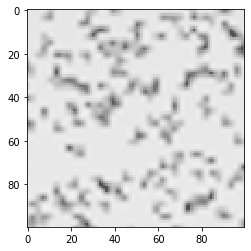

151.0


In [10]:
'''
mat = np.zeros((5,6))
mat[0][0] = 151
mat[0][1] = 149
mat[0][2] = 147
mat[0][3] = 146
mat[0][4] = 148
mat[0][5] = 150
mat[1][0] = 149
mat[1][1] = 145
mat[1][2] = 140
mat[1][3] = 139
mat[1][4] = 141
mat[1][5] = 146
mat[2][0] = 148
mat[2][1] = 143
mat[2][2] = 139
mat[2][3] = 138
mat[2][4] = 141
mat[2][5] = 146
mat[3][0] = 150
mat[3][1] = 146
mat[3][2] = 144
mat[3][3] = 144
mat[3][4] = 146
mat[3][5] = 149
mat[4][0] = 152
mat[4][1] = 151
mat[4][2] = 150
mat[4][3] = 150
mat[4][4] = 151
mat[4][5] = 152
'''
image = open("finalimage.txt","r")

line = image.readline()
img_data = np.zeros((114,150))
i = 0
while(line != ''):
    splitline = line.split()
    for j in range(len(splitline)):
        img_data[i][j] = float(splitline[j])
    i += 1
    line = image.readline()
'''
img_data_sqr = np.zeros((26,26))
for i in range(175,201):
    for j in range(175, 201):
        img_data_sqr[i-175][j-175] = img_data[i][j]
'''

img_data_sqr = np.zeros((100,100))
for i in range(0,100):
    for j in range(0,100):
        img_data_sqr[i][j] = img_data[i][j]
plt.imshow(img_data_sqr, cmap='gray', vmin=0, vmax=255)
plt.show()
mat = img_data_sqr
mat -= 231
mat *= -1
print(np.max(mat))

mat /= 2.5
mat *= 0.000001

def imageThickness(x,y,args):
    r = args['r']
    
    i = int(x*10000000/10)
    j = int(y*10000000/10)
    if i >= -49 and i <= 50 and j >= -49 and j <= 50:
        return mat[j+49][i+49]
    else:
        return 0

    r = args['r']
    if x**2 + y**2 < r**2 and (x-5e-6)**2 + (y-5e-6)**2 < r**2 and (x-3e-6)**2 + (y-3e-6)**2 < r**2:
    #if (x > -r and x < 0) and abs(y) < r:
        return np.sqrt(r**2 - (x**2 + y**2)) * 2 + np.sqrt(r**2 - ((x-5e-6)**2 + (y-5e-6)**2)) * 2 + np.sqrt(r**2 - ((x-3e-6)**2 + (y-3e-6)**2)) * 2 
        #return r
    #if (x >= 0 and x < r) and abs(y) < r:
        #return r/2
    elif x**2 + y**2 < r**2 and (x-3e-6)**2 + (y-3e-6)**2 < r**2:
        return np.sqrt(r**2 - (x**2 + y**2)) * 2 + np.sqrt(r**2 - ((x-3e-6)**2 + (y-3e-6)**2)) * 2
    elif (x-5e-6)**2 + (y-5e-6)**2 < r**2 and (x-3e-6)**2 + (y-3e-6)**2 < r**2:
        return np.sqrt(r**2 - ((x-5e-6)**2 + (y-5e-6)**2)) * 2 + np.sqrt(r**2 - ((x-3e-6)**2 + (y-3e-6)**2)) * 2
    elif (x-5e-6)**2 + (y-5e-6)**2 < r**2:
        return np.sqrt(r**2 - ((x-5e-6)**2 + (y-5e-6)**2)) * 2
    elif (x-3e-6)**2 + (y-3e-6)**2 < r**2:
        return np.sqrt(r**2 - ((x-3e-6)**2 + (y-3e-6)**2)) * 2
    elif x**2 + y**2 < r**2:
        return np.sqrt(r**2 - (x**2 + y**2)) * 2
    else:
        return 0.
        
def RectThickness(x,y,args):
    
    r = args['r']
    if ((x > -2*r and x < -r) or (x > r and x < 2*r)) and abs(y) < r/2:
        return r
    else:
        return 0
    


def attenuation_pw(t_func, shape_args, z0, E, delta, beta, Lx, Ly, nbins_x, nbins_y, norm = False):
    '''
    Inputs:
        t_func (callable): function defining the thickness at (x,y)
        shape_args (dict): arguments specifying the shape's dimensional parameters
        z0        (float): starting z-position of incident plane wave
        E         (float): incident beam energy in Joules
        delta     (float): 1 + real part of refractive index
        beta      (float): imaginary part of refractive index
        Lx        (float): image field x-length
        Ly        (float): image field y-length
        nbins_x     (int): number of x bins
        nbins_y     (int): number of y bins
        norm       (bool): if True, normalizes the output grid
    Outputs:
        attenuated_wave (ndarray): xy grid of waveform values post-attenuation
    '''
    ## Physical constants
    h = 6.6260701e-34    # [J.s]: Planck's constant
    hbar = h/(2*np.pi)
    c = 2.99792458e8     # [m/s]: Speed of light

    ## Material-specific constants
    N = 1 - delta + 1j*beta      # Complex refractive index
    omega = E/hbar               # [1/s]: Angular frequency
    d_phi = (E*delta) / (hbar*c) # phase-shift factor
    d_amp = (E*beta) / (hbar*c)  # attenuation factor
    
    ## Discretization parameters
    dx = Lx/nbins_x      # Spacing between x grid-points
    dy = Ly/nbins_y      # Spacing between y grid-points

    ## Initialize the attenuated wave as a uniform plane wave in the +z direction starting at z0
    attenuated_wave = np.full((nbins_x+1,nbins_y+1), np.exp(1j * (omega/c) * z0), dtype = np.complex128)

    ## Multiply the wave in each grid-point by the appropriate attenuation factor
    for i in range(nbins_x + 1):
        x = (i - nbins_x/2) * dx       # maps index i to coordinate x
        
        for j in range(nbins_y + 1):
            y = (j - nbins_y/2) * dy       # maps index j to coordinate y
            
            t = t_func(x, y, shape_args)       # thickness at entry point (x,y)

            # Propagate the wave pixels by their respective phases and attenuate
            attenuated_wave[i,j] *= np.exp(-(d_amp + 1j*d_phi) * t)
    
    if norm:
        return attenuated_wave / np.sqrt(sum(sum(attenuated_wave)))
    else:
        return attenuated_wave



def propagate(wave, E, d, Lx, Ly, norm = False):
    '''
    Propagates a wave via convolution.
    Args:
        wave (ndarray): 2D array of the discretized wave to be propagated
        E      (float): monochromatic wave energy in vacuum
        d      (float): distance to propagate the wave
        norm    (bool): if True, normalizes the output grid
    Outputs:
        propagated_wave (ndarray): xy grid of propagated waveform values
    '''
    ## Physical constants
    h = 6.6260701e-34    # [J.s]: Planck's constant
    c = 2.99792458e8     # [m/s]: Speed of light
    
    ## Vacuum wavelength and wavevector
    lambda_vac = h*c/E            # [m]: wavelength
    k_vac = 2*np.pi/lambda_vac    # [1/m]: wavevector
        
    ## Prepare a k-space grid
    dim = wave.shape
    dx = Lx/dim[0]      # Spacing between x grid-points
    dy = Ly/dim[1]      # Spacing between y grid-points
    kx = (np.arange(dim[0]) - dim[0] / 2) * 2 * np.pi / (dim[0] * dx)
    ky = (np.arange(dim[1]) - dim[1] / 2) * 2 * np.pi / (dim[1] * dy)
    kxg, kyg = np.meshgrid(kx, ky, indexing = 'ij')
    
    ## Initialize the kernel grid
    kernel = np.exp(-1j * d * (kxg**2 + kyg**2) / (2.0 * k_vac))
    
    ## np.fft.fft assumes the kx, ky = 0 on the corner. np.fft.fftshift centers the k-space grid at (0,0)
    kernel = np.fft.fftshift(kernel)

    ## Propagate the wave through convolution
    propagated_wave = np.exp(1j * k_vac * d) * np.fft.ifft2(kernel * np.fft.fft2(wave))

    if norm:
        return propagated_wave / np.sqrt(sum(sum(propagated_wave))) # Normalize by sqrt of sum intensity
    else:
        return propagated_wave



def attenuate_background(wave, t_func, shape_args, D, E, delta, beta, Lx, Ly, nbins_x, nbins_y, norm = False):
    '''
    Inputs:
        wave    (ndarray): 2D array of wave to be selectively attenuated
        t_func (callable): function defining the thickness at (x,y)
        shape_args (dict): arguments specifying the shape's dimensional parameters
        D         (float): attenuation length (distance parameter in the exponential)
        E         (float): incident beam energy in Joules
        delta     (float): 1 + real part of refractive index
        beta      (float): imaginary part of refractive index
        Lx        (float): image field x-length
        Ly        (float): image field y-length
        nbins_x     (int): number of x bins
        nbins_y     (int): number of y bins
        norm       (bool): if True, normalizes the output grid
    Outputs:
        att_wave (ndarray): xy grid of waveform values post-attenuation
    '''
    h = 6.6260701e-34    # [J.s]: Planck's constant
    hbar = h/(2*np.pi)
    c = 2.99792458e8     # [m/s]: Speed of light
    dim = wave.shape
    att_wave = np.copy(wave)
    
    for i in range(dim[0]):
        x = (i - nbins_x/2) * dx       # maps index i to coordinate x (with centering)
        
        for j in range(dim[1]):
            y = (j - nbins_y/2) * dy       # maps index j to coordinate y (with centering)
            
            if t_func(x,y,shape_args) == 0:
                att_wave[i,j] *= np.exp(-E * beta * D / (hbar * c))
    
    if norm:
        return att_wave / np.sqrt(sum(sum(att_wave))) # Normalize by sqrt of sum intensity
    else:
        return att_wave

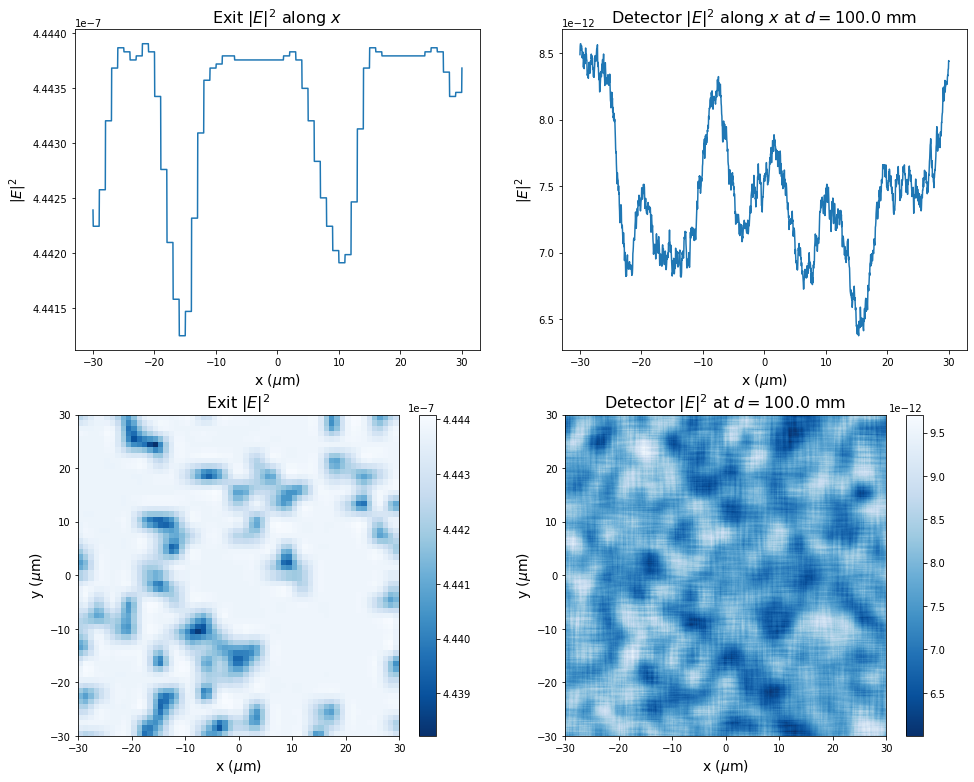

In [11]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10.0e-6               # [m]: sphere radius
args   = {'r': radius}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 60e-6               # [m]: image field x-length
Ly     = 60e-6               # [m]: image field y-length
E0     = 5928.44775 * 0.01        # [eV]: monochromatic beam energy
delta = 1.51026588e-05       # delta for n-Heptane from CXRO
beta  = 3.45463604e-08       # beta for n-Heptane from CXRO

## Discretization parameters
nbins_x  = 1500             # Number of x bins
nbins_y  = 1500           # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points

## Generate the post-attenuation wave:
attenuated_wave = attenuation_pw(t_func = imageThickness, shape_args = args, z0 = -radius,
                                 E = E0*eV2J, delta = delta, beta = beta,
                                 Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

## Propagate the post-attenuation wave to the detector
propagated_wave = propagate(wave = attenuated_wave, E = E0*eV2J, d = d, Lx = Lx, Ly = Ly, norm = True)

## Attenuate the background region assuming nitrogen
delta_N2 = 7.2633e-9
beta_N2  = 3.5494e-11
propagated_wave = attenuate_background(wave = propagated_wave, t_func = imageThickness, shape_args = args, D = args['r'] + d,
                                       E = E0*eV2J, delta = delta_N2, beta = beta_N2,
                                       Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

## Plotting
fig = plt.figure(figsize = (16,13))
ax1 = fig.add_subplot(221)                   # Exit slice along x
ax2 = fig.add_subplot(222)                   # Propagated slice along x
ax3 = fig.add_subplot(223, aspect = 'equal') # Exit grid plot
ax4 = fig.add_subplot(224, aspect = 'equal') # Propagated grid plot

# x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6



## Exit |E|^2 slice along x
ax1.plot(x, abs(attenuated_wave[int(nbins_x/2),:])**2 )
ax1.set_xlabel('x ($\mu$m)', fontsize = 14)
ax1.set_ylabel('$|E|^2$', fontsize = 14)
ax1.set_title('Exit $|E|^2$ along $x$', fontsize = 16)

## Exit Re[E]^2 slice along x
# ax1.plot(x, (attenuated_wave[int(nbins_x/2),:].real)**2, 'k-' )
# ax1.set_ylabel('$Re[E]^2$', fontsize = 14)
# ax1.set_title('Exit Re$[E]^2$ along $x$', fontsize = 16)

## Propagated |E|^2 slice along x
ax2.plot(x, abs(propagated_wave[int(nbins_x/2),:])**2)
ax2.set_xlabel('x ($\mu$m)', fontsize = 14)
ax2.set_ylabel('$|E|^2$', fontsize = 14)
ax2.set_title('Detector $|E|^2$ along $x$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 slice along x
# ax2.plot(x, (propagated_wave[int(nbins_x/2),:].real)**2, 'k-' )
# ax2.set_ylabel('Re$[E]^2$', fontsize = 14)
# ax2.set_title('Detector Re$[E]^2$ along $x$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)


## Exit |E|^2 grid plot
im1 = ax3.pcolormesh(x,y, abs(attenuated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im1, ax = ax3)
ax3.set_xlabel('x ($\mu$m)', fontsize = 14)
ax3.set_ylabel('y ($\mu$m)', fontsize = 14)
ax3.set_title('Exit $|E|^2$', fontsize = 16)

## Exit Re[E]^2 grid plot
# im1 = ax3.pcolormesh(x, y, (attenuated_wave.real)**2, cmap = 'gist_gray')
# ax3.set_title('Exit Re$[E]^2$', fontsize = 16)

## Propagated |E|^2 grid plot
im2 = ax4.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im2, ax = ax4)
ax4.set_xlabel('x ($\mu$m)', fontsize = 14)
ax4.set_ylabel('y ($\mu$m)', fontsize = 14)
ax4.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 grid plot
# im2 = ax4.pcolormesh(x, y, (propagated_wave.real)**2, cmap = 'gist_gray')
# ax4.set_title('Detector Re$[E]^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

Now let's try a cylinder

In [9]:
def CylindricalThickness(x,y,args):
    '''
    Returns thickness through a horizontal cylinder
    of radius r and height h at a given (x,y)
    '''
    r = args['r']
    h = args['h']
    if y**2 < r**2 and abs(x) < h:
        return np.sqrt(r**2 - y**2) * 2
    else:
        return 0.

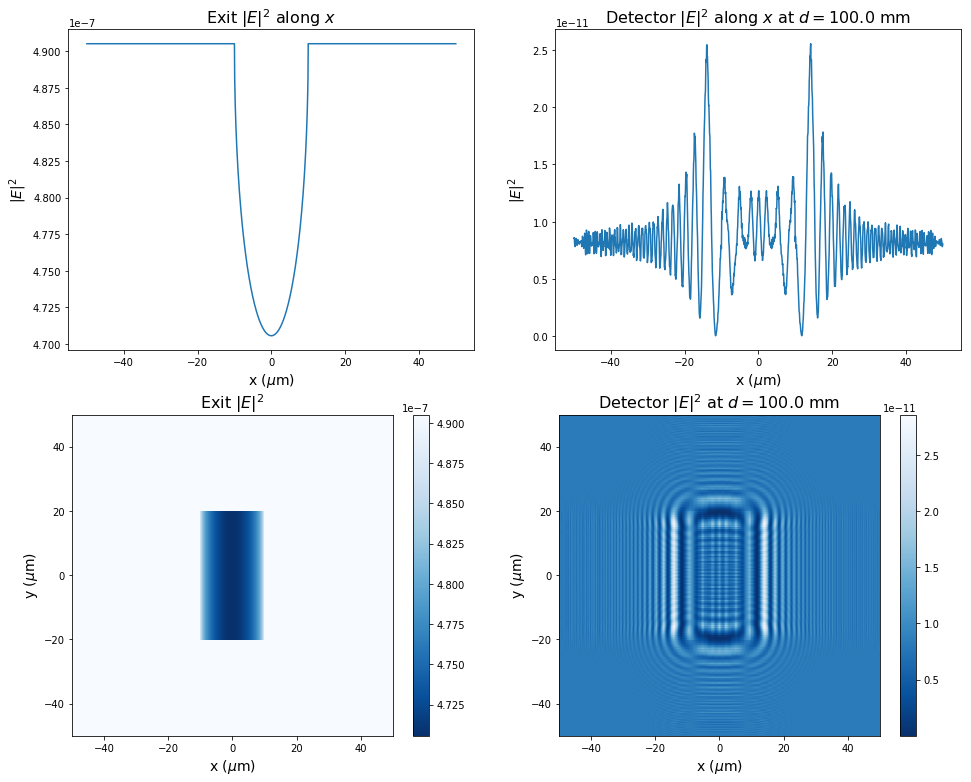

In [10]:
eV2J   = 1.60217662e-19       # [J/eV]

## Physical parameters
radius = 10e-6                # [m]: cylinder radius
height = 20e-6               # [m]: cylinder height
args   = {'r': radius, 'h': height}
d      = 100e-3               # [m]: camera z-distance from edge of cylinder
Lx     = 100e-6               # [m]: image field x-length
Ly     = 100e-6               # [m]: image field y-length
E0     = 5928.44775           # [keV]: incident beam energy
delta = 1.51026588e-05
beta  = 3.45463604e-08

## Discretization parameters
nbins_x  = 1500             # Number of x bins
nbins_y  = 1500             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points



## Generate the post-attenuation wave:
attenuated_wave = attenuation_pw(t_func = CylindricalThickness, shape_args = args, z0 = -args['r'],
                                 E = E0*eV2J, delta = delta, beta = beta,
                                 Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

## Propagate the post-attenuation wave to the detector
propagated_wave = propagate(wave = attenuated_wave, E = E0*eV2J, d = d, Lx = Lx, Ly = Ly, norm = True)

## Attenuate the background region assuming nitrogen
delta_N2 = 7.2633e-9
beta_N2  = 3.5494e-11
propagated_wave = attenuate_background(wave = propagated_wave, t_func = CylindricalThickness, shape_args = args, D = args['r'] + d,
                                       E = E0*eV2J, delta = delta_N2, beta = beta_N2,
                                       Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)



## Plotting
fig = plt.figure(figsize = (16,13))
ax1 = fig.add_subplot(221)                   # Exit slice along x
ax2 = fig.add_subplot(222)                   # Propagated slice along x
ax3 = fig.add_subplot(223, aspect = 'equal') # Exit grid plot
ax4 = fig.add_subplot(224, aspect = 'equal') # Propagated grid plot

# x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6



## Exit |E|^2 slice along x
ax1.plot(x, abs(attenuated_wave[int(nbins_x/2),:])**2 )
ax1.set_xlabel('x ($\mu$m)', fontsize = 14)
ax1.set_ylabel('$|E|^2$', fontsize = 14)
ax1.set_title('Exit $|E|^2$ along $x$', fontsize = 16)

## Exit Re[E]^2 slice along x
# ax1.plot(x, (attenuated_wave[int(nbins_x/2),:].real)**2, 'k-' )
# ax1.set_ylabel('$Re[E]^2$', fontsize = 14)
# ax1.set_title('Exit Re$[E]^2$ along $x$', fontsize = 16)

## Propagated |E|^2 slice along x
ax2.plot(x, abs(propagated_wave[int(nbins_x/2),:])**2 )
ax2.set_xlabel('x ($\mu$m)', fontsize = 14)
ax2.set_ylabel('$|E|^2$', fontsize = 14)
ax2.set_title('Detector $|E|^2$ along $x$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 slice along x
# ax2.plot(x, (propagated_wave[int(nbins_x/2),:].real)**2, 'k-' )
# ax2.set_ylabel('Re$[E]^2$', fontsize = 14)
# ax2.set_title('Detector Re$[E]^2$ along $x$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)


## Exit |E|^2 grid plot
im1 = ax3.pcolormesh(x, y, abs(attenuated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im1, ax = ax3)
ax3.set_xlabel('x ($\mu$m)', fontsize = 14)
ax3.set_ylabel('y ($\mu$m)', fontsize = 14)
ax3.set_title('Exit $|E|^2$', fontsize = 16)

## Exit Re[E]^2 grid plot
# im1 = ax3.pcolormesh(x, y, (attenuated_wave.real)**2, cmap = 'gist_gray')
# ax3.set_title('Exit Re$[E]^2$', fontsize = 16)

## Propagated |E|^2 grid plot
im2 = ax4.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im2, ax = ax4)
ax4.set_xlabel('x ($\mu$m)', fontsize = 14)
ax4.set_ylabel('y ($\mu$m)', fontsize = 14)
ax4.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 grid plot
# im2 = ax4.pcolormesh(x, y, (propagated_wave.real)**2, cmap = 'gist_gray')
# ax4.set_title('Detector Re$[E]^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

Now, a cone:

In [23]:
def ConeThickness(x,y,args):
    '''
    Returns thickness through a horizontal right-opening
    cone of height h and half-angle theta at a given (x,y)
    '''
    h = args['h']
    theta = args['theta']
    
    r = abs(x) * np.tan(theta) # radius of circular cone slice
    
    if abs(y) < r and x < h and x > 0:
        return np.sqrt(r**2 - y**2) * 2
    else:
        return 0.

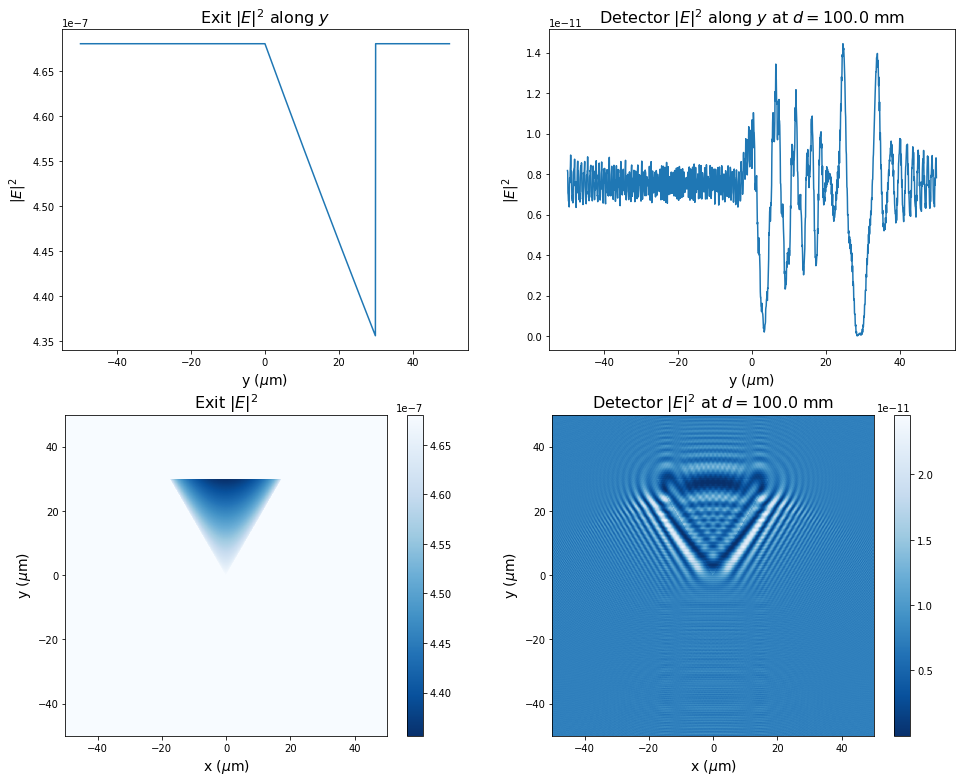

In [24]:
eV2J   = 1.60217662e-19       # [J/eV]

## Physical parameters
height = 30e-6               # [m]: cylinder height
theta  = 30 * np.pi/180      # [rad]: cone half-angle
args   = {'h': height, 'theta': theta}
d      = 100e-3               # [m]: camera z-distance from edge of cylinder
Lx     = 100e-6               # [m]: image field x-length
Ly     = 100e-6               # [m]: image field y-length
E0     = 5928.44775           # [keV]: incident beam energy
delta = 1.51026588e-05
beta  = 3.45463604e-08

## Discretization parameters
nbins_x  = 1500             # Number of x bins
nbins_y  = 1500             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points


## Generate the post-attenuation wave:
attenuated_wave = attenuation_pw(t_func = ConeThickness, shape_args = args, z0 = -args['h']*np.tan(args['theta']),
                                 E = E0*eV2J, delta = delta, beta = beta,
                                 Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

## Propagate the post-attenuation wave to the detector
propagated_wave = propagate(wave = attenuated_wave, E = E0*eV2J, d = d, Lx = Lx, Ly = Ly, norm = True)

## Attenuate the background region assuming nitrogen
delta_N2 = 7.2633e-9
beta_N2  = 3.5494e-11
propagated_wave = attenuate_background(wave = propagated_wave, t_func = ConeThickness, shape_args = args, D = args['h']*np.tan(args['theta']) + d,
                                       E = E0*eV2J, delta = delta_N2, beta = beta_N2,
                                       Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)



## Plotting
fig = plt.figure(figsize = (16,13))
ax1 = fig.add_subplot(221)                   # Exit slice along y
ax2 = fig.add_subplot(222)                   # Propagated slice along y
ax3 = fig.add_subplot(223, aspect = 'equal') # Exit grid plot
ax4 = fig.add_subplot(224, aspect = 'equal') # Propagated grid plot

# x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6



## Exit |E|^2 slice along y
ax1.plot(x, abs(attenuated_wave[:,int(nbins_x/2)])**2 )
ax1.set_xlabel('y ($\mu$m)', fontsize = 14)
ax1.set_ylabel('$|E|^2$', fontsize = 14)
ax1.set_title('Exit $|E|^2$ along $y$', fontsize = 16)

## Exit Re[E]^2 slice along y
# ax1.plot(x, (attenuated_wave[:,int(nbins_x/2)].real)**2, 'k-' )
# ax1.set_ylabel('$Re[E]^2$', fontsize = 14)
# ax1.set_title('Exit Re$[E]^2$ along $x$', fontsize = 16)

## Propagated |E|^2 slice along y
ax2.plot(x, abs(propagated_wave[:,int(nbins_x/2)])**2)
ax2.set_xlabel('y ($\mu$m)', fontsize = 14)
ax2.set_ylabel('$|E|^2$', fontsize = 14)
ax2.set_title('Detector $|E|^2$ along $y$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 slice along y
# ax2.plot(x, (propagated_wave[:,int(nbins_x/2)].real)**2, 'k-' )
# ax2.set_ylabel('Re$[E]^2$', fontsize = 14)
# ax2.set_title('Detector Re$[E]^2$ along $x$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)


## Exit |E|^2 grid plot
im1 = ax3.pcolormesh(x, y, abs(attenuated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im1, ax = ax3)
ax3.set_xlabel('x ($\mu$m)', fontsize = 14)
ax3.set_ylabel('y ($\mu$m)', fontsize = 14)
ax3.set_title('Exit $|E|^2$', fontsize = 16)

## Exit Re[E]^2 grid plot
# im1 = ax3.pcolormesh(x, y, (attenuated_wave.real)**2, cmap = 'gist_gray')
# ax3.set_title('Exit Re$[E]^2$', fontsize = 16)

## Propagated |E|^2 grid plot
im2 = ax4.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im2, ax = ax4)
ax4.set_xlabel('x ($\mu$m)', fontsize = 14)
ax4.set_ylabel('y ($\mu$m)', fontsize = 14)
ax4.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 grid plot
# im2 = ax4.pcolormesh(x, y, (propagated_wave.real)**2, cmap = 'gist_gray')
# ax4.set_title('Detector Re$[E]^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

Now, a sphere with a bubble.

In [25]:
def SphericalThickness_SphericalBubble(x, y, args):
    '''
    At a given (x,y), returns thickness of straight line
    through sphere of radius r with spherical air bubble of 
    radius r_b embedded at (x_b, y_b).
    '''
    r = args['r']
    r_b = args['r_b']
    x_b = args['x_b']
    y_b = args['y_b']

    if (x - x_b)**2 + (y - y_b)**2 < r_b**2 :
        return SphericalThickness(x, y, {'r': r}) - SphericalThickness(x_b, y_b, {'r': r_b})
    else:
        return SphericalThickness(x, y, {'r': r})

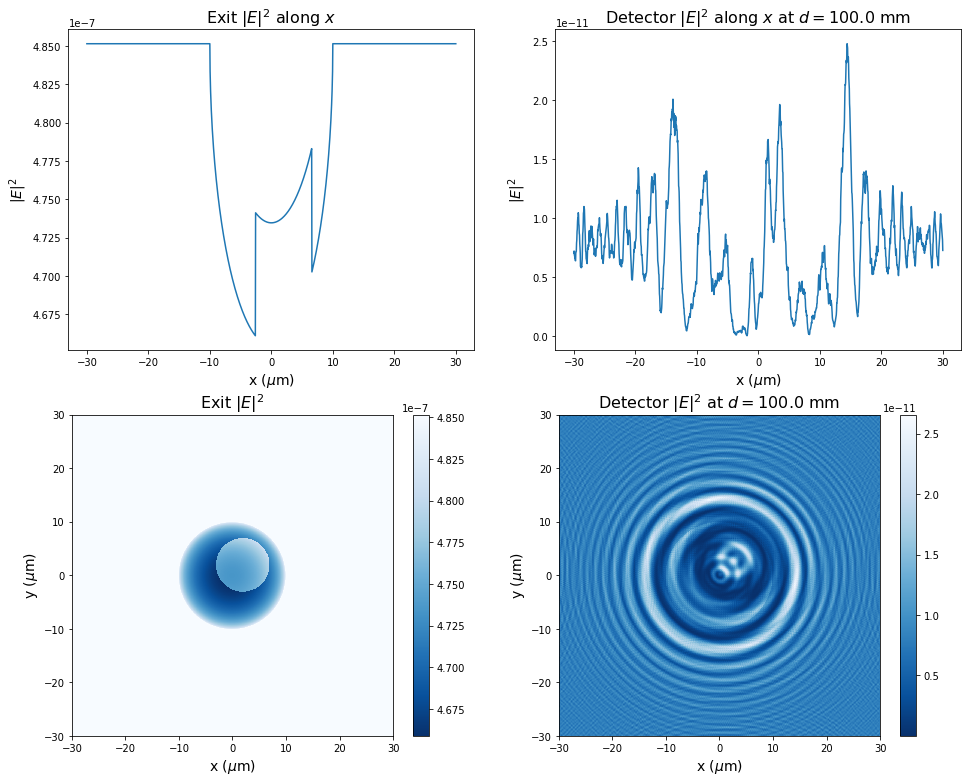

In [27]:
## Physical parameters
eV2J     = 1.60217662e-19      # [J/eV]
radius   = 10e-6               # [m]: sphere radius
radius_b = 5e-6                # [m]: bubble radius
x_b, y_b = (2e-6,2e-6)
args     = {'r':   radius,
            'r_b': radius_b,
            'x_b': x_b,
            'y_b': y_b}
d        = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx       = 60e-6              # [m]: image field x-length
Ly       = 60e-6              # [m]: image field y-length
E0       = 5928.44775          # [eV]: monochromatic beam energy
delta    = 1.51026588e-05      # delta for n-Heptane from CXRO
beta     = 3.45463604e-08      # beta for n-Heptane from CXRO

## Discretization parameters
nbins_x  = 1500             # Number of x bins
nbins_y  = 1500             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points

## Generate the post-attenuation wave:
attenuated_wave = attenuation_pw(t_func = SphericalThickness_SphericalBubble, shape_args = args, z0 = -radius,
                                 E = E0*eV2J, delta = delta, beta = beta,
                                 Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

## Propagate the post-attenuation wave to the detector
propagated_wave = propagate(wave = attenuated_wave, E = E0*eV2J, d = d, Lx = Lx, Ly = Ly, norm = True)

## Attenuate the background region assuming nitrogen
delta_N2 = 7.2633e-9
beta_N2  = 3.5494e-11
propagated_wave = attenuate_background(wave = propagated_wave, t_func = SphericalThickness, shape_args = args, D = args['r'] + d,
                                       E = E0*eV2J, delta = delta_N2, beta = beta_N2,
                                       Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)


## Plotting
fig = plt.figure(figsize = (16,13))
ax1 = fig.add_subplot(221)                   # Exit slice along x
ax2 = fig.add_subplot(222)                   # Propagated slice along x
ax3 = fig.add_subplot(223, aspect = 'equal') # Exit grid plot
ax4 = fig.add_subplot(224, aspect = 'equal') # Propagated grid plot

# x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6



## Exit |E|^2 slice along x
ax1.plot(x, abs(attenuated_wave[int(nbins_x/2),:])**2 )
ax1.set_xlabel('x ($\mu$m)', fontsize = 14)
ax1.set_ylabel('$|E|^2$', fontsize = 14)
ax1.set_title('Exit $|E|^2$ along $x$', fontsize = 16)

## Exit Re[E]^2 slice along x
# ax1.plot(x, (attenuated_wave[int(nbins_x/2),:].real)**2, 'k-' )
# ax1.set_ylabel('$Re[E]^2$', fontsize = 14)
# ax1.set_title('Exit Re$[E]^2$ along $x$', fontsize = 16)

## Propagated |E|^2 slice along x
ax2.plot(x, abs(propagated_wave[int(nbins_x/2),:])**2)
ax2.set_xlabel('x ($\mu$m)', fontsize = 14)
ax2.set_ylabel('$|E|^2$', fontsize = 14)
ax2.set_title('Detector $|E|^2$ along $x$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 slice along x
# ax2.plot(x, (propagated_wave[int(nbins_x/2),:].real)**2, 'k-' )
# ax2.set_ylabel('Re$[E]^2$', fontsize = 14)
# ax2.set_title('Detector Re$[E]^2$ along $x$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)


## Exit |E|^2 grid plot
im1 = ax3.pcolormesh(x, y, abs(attenuated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im1, ax = ax3)
ax3.set_xlabel('x ($\mu$m)', fontsize = 14)
ax3.set_ylabel('y ($\mu$m)', fontsize = 14)
ax3.set_title('Exit $|E|^2$', fontsize = 16)

## Exit Re[E]^2 grid plot
# im1 = ax3.pcolormesh(x, y, (attenuated_wave.real)**2, cmap = 'gist_gray')
# ax3.set_title('Exit Re$[E]^2$', fontsize = 16)

## Propagated |E|^2 grid plot
im2 = ax4.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im2, ax = ax4)
ax4.set_xlabel('x ($\mu$m)', fontsize = 14)
ax4.set_ylabel('y ($\mu$m)', fontsize = 14)
ax4.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

## Propagated Re[E]^2 grid plot
# im2 = ax4.pcolormesh(x, y, (propagated_wave.real)**2, cmap = 'gist_gray')
# ax4.set_title('Detector Re$[E]^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

# Animations

## Image by image

In [ ]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
args   = {'r': radius}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 60e-6               # [m]: image field x-length
Ly     = 60e-6               # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy
delta = 1.51026588e-05       # delta for n-Heptane from CXRO
beta  = 3.45463604e-08       # beta for n-Heptane from CXRO

## Discretization parameters
nbins_x  = 200             # Number of x bins
nbins_y  = 200             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points

## Generate the post-attenuation wave:
attenuated_wave = attenuation_pw(t_func = SphericalThickness, shape_args = args, z0 = -radius,
                                 E = E0*eV2J, delta = delta, beta = beta,
                                 Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

## Attenuate the background region assuming nitrogen
delta_N2 = 7.2633e-9
beta_N2  = 3.5494e-11

# x and y positions (in microns) corresponding to each bin.
dim = attenuated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6
fig = plt.figure()
ax = fig.add_subplot(111, aspect = 'equal')

for i, d_val in enumerate(np.linspace(0,d,101)):
    ## Propagate the post-attenuation wave to the detector
    propagated_wave = propagate(wave = attenuated_wave, E = E0*eV2J, d = d_val, Lx = Lx, Ly = Ly, norm = True)
    propagated_wave = attenuate_background(wave = propagated_wave, t_func = SphericalThickness, shape_args = args, D = args['r'] + d_val,
                                           E = E0*eV2J, delta = delta_N2, beta = beta_N2,
                                           Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)
    ## Exit |E|^2 grid plot
    im = ax.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
    if i == 0:
        fig.colorbar(im, ax = ax)
    ax.set_xlabel('x ($\mu$m)', fontsize = 14)
    ax.set_ylabel('y ($\mu$m)', fontsize = 14)
    ax.set_title('Detector $|E|^2$ at $d =$ {} mm'.format(round(d_val*1e3,2)), fontsize = 16)
    plt.savefig('sphere_{}mm.png'.format(round(d_val*1e3,2)))
    

## Animation package

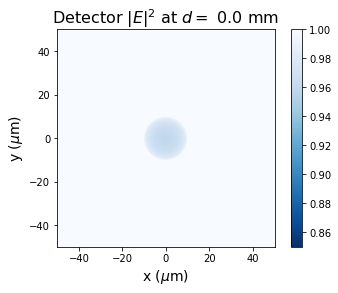

In [26]:
import matplotlib.animation as animation

## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
args   = {'r': radius}
zlim   = [0.,101e-3]         # [m]: limits of camera z-distance from far edge of sphere
frames = 101
Lx     = 100e-6               # [m]: image field x-length
Ly     = 100e-6               # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy
delta = 1.51026588e-05       # delta for n-Heptane from CXRO
beta  = 3.45463604e-08       # beta for n-Heptane from CXRO

## Discretization parameters
nbins_x  = 1000             # Number of x bins
nbins_y  = 1000             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points
dz       = (zlim[1] - zlim[0]) / frames

## Generate the post-attenuation wave:
attenuated_wave = attenuation_pw(t_func = SphericalThickness, shape_args = args, z0 = -radius,
                                 E = E0*eV2J, delta = delta, beta = beta,
                                 Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = False)
delta_N2 = 7.2633e-9
beta_N2  = 3.5494e-11
    
## Propagate the post-attenuation wave to the detector
propagated_wave = propagate(wave = attenuated_wave, E = E0*eV2J, d = zlim[0], Lx = Lx, Ly = Ly, norm = False)

## Attenuate the background region assuming nitrogen
# propagated_wave = attenuate_background(wave = propagated_wave, t_func = SphericalThickness, shape_args = args, D = args['r'] + zlim[0],
#                                        E = E0*eV2J, delta = delta_N2, beta = beta_N2,
#                                        Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = False)


dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6
z = abs(propagated_wave) ** 2

fig = plt.figure()

ax = fig.add_subplot(111, aspect = 'equal')
quad = ax.pcolormesh(x, y, z, cmap = 'Blues_r', vmin = 0.85, vmax = 1.)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$', fontsize = 16)
fig.colorbar(quad, ax = ax)


def init():
    quad.set_array([])
    return quad

def animate(iter):
    ax.set_title('Detector $|E|^2$ at $d =$ {} mm'.format(round(iter*dz*1e3,2)), fontsize = 16)
    z = propagate(wave = attenuated_wave, E = E0*eV2J, d = zlim[0] + iter*dz, Lx = Lx, Ly = Ly, norm = False)
#     z = attenuate_background(wave = z, t_func = SphericalThickness, shape_args = args, D = args['r'] + zlim[0] + iter*dz,
#                              E = E0*eV2J, delta = delta_N2, beta = beta_N2,
#                              Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = False)
    z = abs(z) ** 2
    quad.set_array(np.ravel(z[:-1,:-1]))
    return quad

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=frames, blit=False, repeat=False)

from IPython.display import HTML

HTML(anim.to_html5_video())    # Shows the animation inline

## Code for polychromatic waves from harmonics

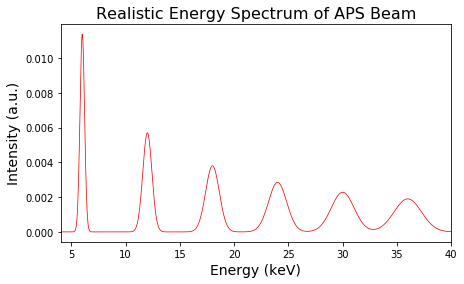

In [28]:
def gaussian(x,mu,sigma):
    return ( 1/(np.sqrt(2*np.pi*(sigma**2))) ) * np.exp( -( ((x-mu)/sigma)**2 )/2)

def makeGaussianHarmonics(E_fund, N_harmonics, N_samples, E_lim = None, sigmas = None):
    ''' Returns a normalized intensity distribution of Gaussians
        centered at harmonics of E_fund.'''
    centroids = [i*E_fund for i in range(1,N_harmonics+2)]

    if sigmas is None:
        sigmas = [0.035*E for E in centroids]

    if E_lim is None:
        energy_axis = np.linspace(E_fund * 0.5, E_fund * 1.5, N_samples)
    else:
        assert E_lim[0] <= E_fund, "E_lim[0] must be less than E_fund."
        energy_axis = np.linspace(E_lim[0], E_lim[1], N_samples)
        
    beam_profile = 0
    for n,E in enumerate(centroids):
        beam_profile += gaussian(energy_axis, centroids[n], sigmas[n])

    beam_profile /= sum(beam_profile) # normalize the profile
    
    return [energy_axis, beam_profile]

E0 = 6.0
energy_axis, beam_profile = makeGaussianHarmonics(E0, 5, 1000, E_lim = [4.0, 40.0])

fig = plt.figure(figsize = (7,4))
ax  = fig.add_subplot(111)
ax.plot(energy_axis, beam_profile, 'r-', lw = 0.75)
ax.set_xlim([4,40])
ax.set_xlabel('Energy (keV)', fontsize = 14)
ax.set_ylabel('Intensity (a.u.)', fontsize = 14)
ax.set_title('Realistic Energy Spectrum of APS Beam', fontsize = 16)
plt.savefig('APS_Spectrum.png')
plt.show()
# for i in range(len(energy_axis)):
#     print(energy_axis[i], beam_profile[i])

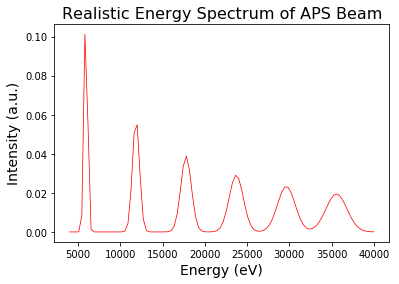

In [29]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
args   = {'r': radius}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 100e-6              # [m]: image field x-length
Ly     = 100e-6              # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy

## Discretization parameters
nbins_x  = 1500             # Number of x bins 
nbins_y  = 1500             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points

## Prepare an energy profile and plot for visual confirmation
energy_axis, beam_profile = makeGaussianHarmonics(E_fund = E0, N_harmonics = 5, N_samples = 100, E_lim = [4e3, 40e3])

plt.plot(energy_axis, beam_profile, 'r-', lw = 0.75)
plt.xlabel('Energy (eV)', fontsize = 14)
plt.ylabel('Intensity (a.u.)', fontsize = 14)
plt.title('Realistic Energy Spectrum of APS Beam', fontsize = 16)
plt.show()

## Import refractive index data as a function of energy
data = np.loadtxt('heptane_refr_indices.txt', skiprows = 2)
E_refr, delta_refr, beta_refr = (data[:,0], data[:,1], data[:,2]) # E_refr will be in eV

## Find the delta,beta values in delta_refr,beta_refr corresponding to energies sampled in energy_axis
deltas = np.zeros(len(energy_axis))
betas  = np.zeros(len(energy_axis))

for i,E in enumerate(energy_axis):
    # find index of the energy in E_refr closest to E
    dE        = abs(E_refr - E)
    index     = list(dE).index(min(dE)) # find the index of the minimum difference
    deltas[i] = delta_refr[index]
    betas[i]  = beta_refr[index]

full_intensity = np.zeros((nbins_x+1,nbins_y+1), dtype = np.float64)

for i,E in enumerate(energy_axis):
    # Generate an attenuated wave for energy E
    attenuated_wave =  attenuation_pw(t_func = SphericalThickness, shape_args = args, z0 = -args['r'],
                                      E = E*eV2J, delta = deltas[i], beta = betas[i],
                                      Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

    # Propagate that energy=E wave to the detector at z = d
    propagated_wave = propagate(wave = attenuated_wave, E = E*eV2J, d = d, Lx = Lx, Ly = Ly, norm = True)

    # Weigh this energy's intensity waveform according to the beam's relative intensity distribution
    weighted_intensity = ( abs(propagated_wave) ** 2 ) * beam_profile[i]
    
    # Add the weighted intensity waveform for this energy to the full-intensity waveform
    full_intensity += weighted_intensity

# Normalize the final intensity image
full_intensity /= np.sqrt(sum(sum(full_intensity)))

In [ ]:
## x and y positions (in microns) corresponding to each bin.
dim = full_intensity.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6

## Propagated |E|^2 grid plot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, aspect = 'equal') # Exit grid plot
im = ax.pcolormesh(x, y, abs(full_intensity)**2, cmap = 'Blues_r')
fig.colorbar(im, ax = ax)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

Now for a cylinder

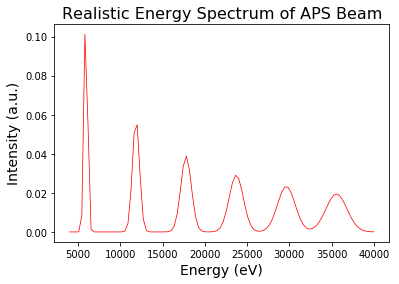

KeyboardInterrupt: 

In [30]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
height = 20e-6               # [m]: cylinder height
args   = {'r': radius, 'h': height}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 100e-6              # [m]: image field x-length
Ly     = 100e-6              # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy

## Discretization parameters
nbins_x  = 1500             # Number of x bins 
nbins_y  = 1500             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points

## Prepare an energy profile and plot for visual confirmation
energy_axis, beam_profile = makeGaussianHarmonics(E_fund = E0, N_harmonics = 5, N_samples = 100, E_lim = [4e3, 40e3])

plt.plot(energy_axis, beam_profile, 'r-', lw = 0.75)
plt.xlabel('Energy (eV)', fontsize = 14)
plt.ylabel('Intensity (a.u.)', fontsize = 14)
plt.title('Realistic Energy Spectrum of APS Beam', fontsize = 16)
plt.show()

## Import refractive index data as a function of energy
data = np.loadtxt('heptane_refr_indices.txt', skiprows = 2)
E_refr, delta_refr, beta_refr = (data[:,0], data[:,1], data[:,2]) # E_refr will be in eV

## Find the delta,beta values in delta_refr,beta_refr corresponding to energies sampled in energy_axis
deltas = np.zeros(len(energy_axis))
betas  = np.zeros(len(energy_axis))

for i,E in enumerate(energy_axis):
    # find index of the energy in E_refr closest to E
    dE        = abs(E_refr - E)
    index     = list(dE).index(min(dE)) # find the index of the minimum difference
    deltas[i] = delta_refr[index]
    betas[i]  = beta_refr[index]

full_intensity = np.zeros((nbins_x+1,nbins_y+1), dtype = np.float64)

for i,E in enumerate(energy_axis):
    # Generate an attenuated wave for energy E
    attenuated_wave =  attenuation_pw(t_func = CylindricalThickness, shape_args = args, z0 = -args['r'],
                                      E = E*eV2J, delta = deltas[i], beta = betas[i],
                                      Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

    # Propagate that energy=E wave to the detector at z = d
    propagated_wave = propagate(wave = attenuated_wave, E = E*eV2J, d = d, Lx = Lx, Ly = Ly, norm = True)

    # Weigh this energy's intensity waveform according to the beam's relative intensity distribution
    weighted_intensity = ( abs(propagated_wave) ** 2 ) * beam_profile[i]
    
    # Add the weighted intensity waveform for this energy to the full-intensity waveform
    full_intensity += weighted_intensity

# Normalize the final intensity image
full_intensity /= np.sqrt(sum(sum(full_intensity)))

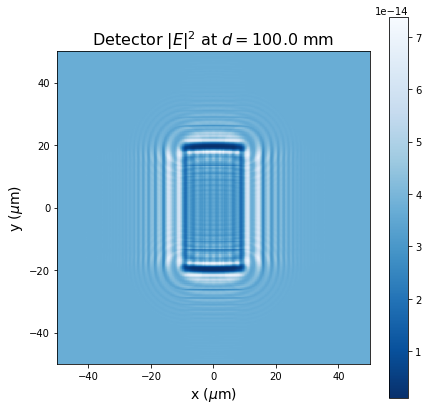

In [60]:
## x and y positions (in microns) corresponding to each bin.
dim = full_intensity.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6

## Propagated |E|^2 grid plot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, aspect = 'equal') # Exit grid plot
im = ax.pcolormesh(x, y, abs(full_intensity)**2, cmap = 'Blues_r')
fig.colorbar(im, ax = ax)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

Now for a spherical bubble

In [ ]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius   = 10e-6               # [m]: sphere radius
radius_b = 5e-6                # [m]: bubble radius
x_b, y_b = (0,0)
args     = {'r':   radius,
            'r_b': radius_b,
            'x_b': x_b,
            'y_b': y_b}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 100e-6              # [m]: image field x-length
Ly     = 100e-6              # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy

## Discretization parameters
nbins_x  = 500             # Number of x bins 
nbins_y  = 500             # Number of y bins
dx       = Lx/nbins_x      # Spacing between x grid-points
dy       = Ly/nbins_y      # Spacing between y grid-points

## Prepare an energy profile and plot for visual confirmation
energy_axis, beam_profile = makeGaussianHarmonics(E_fund = E0, N_harmonics = 5, N_samples = 500, E_lim = [4e3, 40e3])

plt.plot(energy_axis, beam_profile, 'r-', lw = 0.75)
plt.xlabel('Energy (eV)', fontsize = 14)
plt.ylabel('Intensity (a.u.)', fontsize = 14)
plt.title('Realistic Energy Spectrum of APS Beam', fontsize = 16)
plt.show()

## Import refractive index data as a function of energy
data = np.loadtxt('heptane_refr_indices.txt', skiprows = 2)
E_refr, delta_refr, beta_refr = (data[:,0], data[:,1], data[:,2]) # E_refr will be in eV

## Find the delta,beta values in delta_refr,beta_refr corresponding to energies sampled in energy_axis
deltas = np.zeros(len(energy_axis))
betas  = np.zeros(len(energy_axis))

for i,E in enumerate(energy_axis):
    # find index of the energy in E_refr closest to E
    dE        = abs(E_refr - E)
    index     = list(dE).index(min(dE)) # find the index of the minimum difference
    deltas[i] = delta_refr[index]
    betas[i]  = beta_refr[index]

full_intensity = np.zeros((nbins_x+1,nbins_y+1), dtype = np.float64)

for i,E in enumerate(energy_axis):
    # Generate an attenuated wave for energy E
    attenuated_wave =  attenuation_pw(t_func = SphericalThickness_SphericalBubble, shape_args = args, z0 = -args['r'],
                                      E = E*eV2J, delta = deltas[i], beta = betas[i],
                                      Lx = Lx, Ly = Ly, nbins_x = nbins_x, nbins_y = nbins_y, norm = True)

    # Propagate that energy=E wave to the detector at z = d
    propagated_wave = propagate(wave = attenuated_wave, E = E*eV2J, d = d, Lx = Lx, Ly = Ly, norm = True)

    # Weigh this energy's intensity waveform according to the beam's relative intensity distribution
    weighted_intensity = ( abs(propagated_wave) ** 2 ) * beam_profile[i]
    
    # Add the weighted intensity waveform for this energy to the full-intensity waveform
    full_intensity += weighted_intensity

# Normalize the final intensity image
full_intensity /= np.sqrt(sum(sum(full_intensity)))

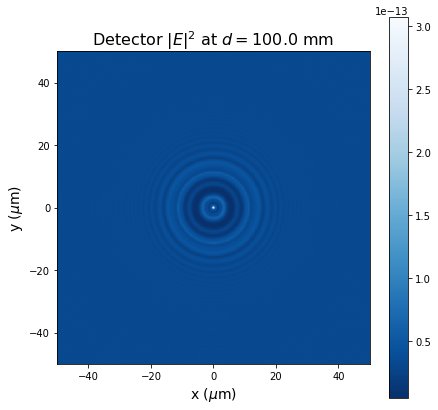

In [62]:
## x and y positions (in microns) corresponding to each bin.
dim = full_intensity.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6

## Propagated |E|^2 grid plot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, aspect = 'equal') # Exit grid plot
im = ax.pcolormesh(x, y, abs(full_intensity)**2, cmap = 'Blues_r')
fig.colorbar(im, ax = ax)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

## Propagating Waveforms from External Data

In [58]:
Efield1 = np.loadtxt('Esum.txt', delimiter = ',', dtype = 'str')
Efield = np.zeros_like(Efield1, dtype = np.complex128)

for ix in range(len(Efield1)):
    for iy in range(len(Efield1)):
        Efield[ix,iy] = eval(Efield1[ix,iy].replace('i','j'))

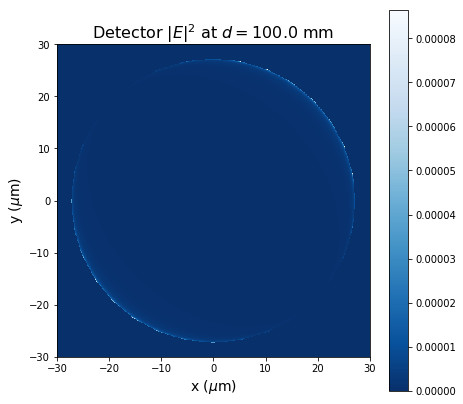

In [59]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
args   = {'r': radius}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 60e-6               # [m]: image field x-length
Ly     = 60e-6               # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy
delta = 1.51026588e-05       # delta for n-Heptane from CXRO
beta  = 3.45463604e-08       # beta for n-Heptane from CXRO

## Discretization parameters
nbins_x  = len(Efield[0,:])  # Number of x bins
nbins_y  = len(Efield[:,0])  # Number of y bins
dx       = Lx/nbins_x              # Spacing between x grid-points
dy       = Ly/nbins_y              # Spacing between y grid-points



propagated_wave = propagate(Efield, E = E0, d = d, Lx = Lx, Ly = Ly, norm = False)



## x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6

## Propagated |E|^2 grid plot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, aspect = 'equal') # Exit grid plot
im = ax.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im, ax = ax)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

In [75]:
exponentials1 = np.loadtxt('factors.txt', delimiter = ',', dtype = 'str')
exponentials = np.zeros_like(exponentials1, dtype = np.complex128)

for ix in range(len(exponentials1)):
    for iy in range(len(exponentials1)):
        exponentials[ix,iy] = eval(exponentials1[ix,iy].replace('i','j'))

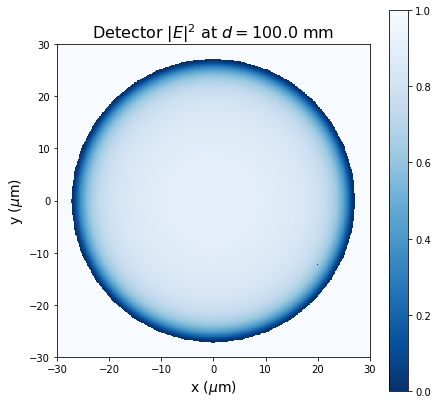

In [79]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
args   = {'r': radius}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 60e-6               # [m]: image field x-length
Ly     = 60e-6               # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy
delta  = 1.51026588e-05      # delta for n-Heptane from CXRO
beta   = 3.45463604e-08      # beta for n-Heptane from CXRO

h      = 6.6260701e-34       # [J.s]: Planck's constant
hbar   = h/(2*np.pi)
c      = 2.99792458e8        # [m/s]: Speed of light
omega  = E0/hbar              # [1/s]: Angular frequency


## Discretization parameters
nbins_x  = len(exponentials[0,:])  # Number of x bins
nbins_y  = len(exponentials[:,0])  # Number of y bins
dx       = Lx/nbins_x              # Spacing between x grid-points
dy       = Ly/nbins_y              # Spacing between y grid-points


plane_wave = np.full((nbins_x,nbins_y), np.exp(1j * (omega/c) * -radius), dtype = np.complex128)
Efield          = plane_wave * exponentials 
propagated_wave = propagate(Efield, E = E0, d = d, Lx = Lx, Ly = Ly, norm = False)



## x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6

## Propagated |E|^2 grid plot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, aspect = 'equal') # Exit grid plot
im = ax.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im, ax = ax)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

In [83]:
exponentials1 = np.loadtxt('factors1.txt', delimiter = ',', dtype = 'str')
exponentials = np.zeros_like(exponentials1, dtype = np.complex128)

for ix in range(len(exponentials1)):
    for iy in range(len(exponentials1)):
        exponentials[ix,iy] = eval(exponentials1[ix,iy].replace('i','j'))

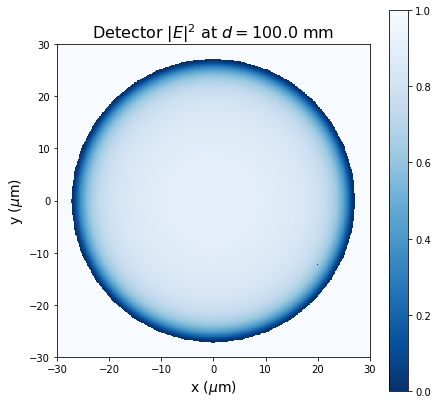

In [84]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
args   = {'r': radius}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 60e-6               # [m]: image field x-length
Ly     = 60e-6               # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy
delta  = 1.51026588e-05      # delta for n-Heptane from CXRO
beta   = 3.45463604e-08      # beta for n-Heptane from CXRO

h      = 6.6260701e-34       # [J.s]: Planck's constant
hbar   = h/(2*np.pi)
c      = 2.99792458e8        # [m/s]: Speed of light
omega  = E0/hbar              # [1/s]: Angular frequency


## Discretization parameters
nbins_x  = len(exponentials[0,:])  # Number of x bins
nbins_y  = len(exponentials[:,0])  # Number of y bins
dx       = Lx/nbins_x              # Spacing between x grid-points
dy       = Ly/nbins_y              # Spacing between y grid-points


plane_wave = np.full((nbins_x,nbins_y), np.exp(1j * (omega/c) * -radius), dtype = np.complex128)
Efield          = plane_wave * exponentials 
propagated_wave = propagate(Efield, E = E0, d = d, Lx = Lx, Ly = Ly, norm = False)



## x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6

## Propagated |E|^2 grid plot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, aspect = 'equal') # Exit grid plot
im = ax.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im, ax = ax)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()

In [86]:
exponentials1 = np.loadtxt('factors2.txt', delimiter = ',', dtype = 'str')
exponentials = np.zeros_like(exponentials1, dtype = np.complex128)

for ix in range(len(exponentials1)):
    for iy in range(len(exponentials1)):
        exponentials[ix,iy] = eval(exponentials1[ix,iy].replace('i','j'))

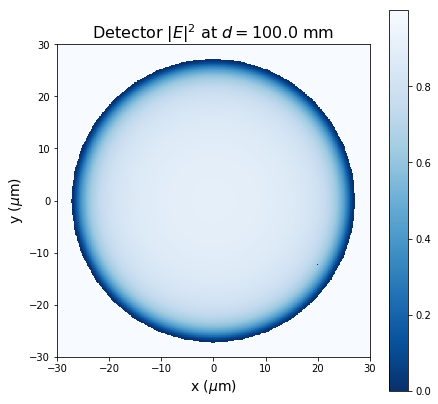

In [87]:
## Physical parameters
eV2J   = 1.60217662e-19      # [J/eV]
radius = 10e-6               # [m]: sphere radius
args   = {'r': radius}
d      = 100e-3              # [m]: camera z-distance from far edge of sphere
Lx     = 60e-6               # [m]: image field x-length
Ly     = 60e-6               # [m]: image field y-length
E0     = 5928.44775          # [eV]: monochromatic beam energy
delta  = 1.51026588e-05      # delta for n-Heptane from CXRO
beta   = 3.45463604e-08      # beta for n-Heptane from CXRO

h      = 6.6260701e-34       # [J.s]: Planck's constant
hbar   = h/(2*np.pi)
c      = 2.99792458e8        # [m/s]: Speed of light
omega  = E0/hbar              # [1/s]: Angular frequency


## Discretization parameters
nbins_x  = len(exponentials[0,:])  # Number of x bins
nbins_y  = len(exponentials[:,0])  # Number of y bins
dx       = Lx/nbins_x              # Spacing between x grid-points
dy       = Ly/nbins_y              # Spacing between y grid-points


plane_wave = np.full((nbins_x,nbins_y), np.exp(1j * (omega/c) * -radius), dtype = np.complex128)
Efield          = plane_wave * exponentials 
propagated_wave = propagate(Efield, E = E0, d = d, Lx = Lx, Ly = Ly, norm = False)



## x and y positions (in microns) corresponding to each bin.
dim = propagated_wave.shape
x = np.linspace(-nbins_x/2, nbins_x/2, dim[0]) * dx * 1e6
y = np.linspace(-nbins_y/2, nbins_y/2, dim[1]) * dy * 1e6

## Propagated |E|^2 grid plot
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, aspect = 'equal') # Exit grid plot
im = ax.pcolormesh(x, y, abs(propagated_wave)**2, cmap = 'Blues_r')
fig.colorbar(im, ax = ax)
ax.set_xlabel('x ($\mu$m)', fontsize = 14)
ax.set_ylabel('y ($\mu$m)', fontsize = 14)
ax.set_title('Detector $|E|^2$ at $d=$'+str(d*1e3)+' mm', fontsize = 16)

plt.show()